<a href="https://colab.research.google.com/github/Medhashaharkar/FrenchPastryClassifier/blob/main/fast_ai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 28.0 MB/s eta 0:00:00


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('croissant', max_images=1)
print(urls)
urls[0]

Searching for 'croissant'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


['https://bakingamoment.com/wp-content/uploads/2019/02/IMG_2757-croissant-recipe-easy.jpg']


'https://bakingamoment.com/wp-content/uploads/2019/02/IMG_2757-croissant-recipe-easy.jpg'

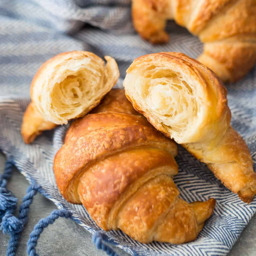

In [6]:
from fastdownload import download_url
dest = 'croissant.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'pain_au_chocolat'


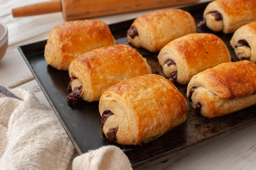

In [9]:
download_url(search_images('pain_au_chocolat', max_images=1)[0], 'pain_au_chocolat.jpg', show_progress=False)
Image.open('pain_au_chocolat.jpg').to_thumb(256,256)

Searching for 'eclair'


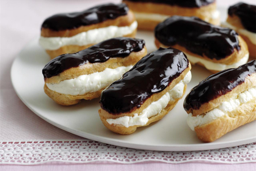

In [8]:
download_url(search_images('eclair', max_images=1)[0], 'eclair.jpg', show_progress=False)
Image.open('eclair.jpg').to_thumb(256,256)

In [13]:
searches = 'croissant','pain_au_chocolat', 'chcoclate_eclair'
path = Path('pastry')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'croissant photo'
Searching for 'croissant sun photo'
Searching for 'croissant shade photo'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'pain_au_chocolat photo'
Searching for 'pain_au_chocolat sun photo'
Searching for 'pain_au_chocolat shade photo'
Searching for 'chcoclate_eclair photo'
Searching for 'chcoclate_eclair sun photo'
Searching for 'chcoclate_eclair shade photo'


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

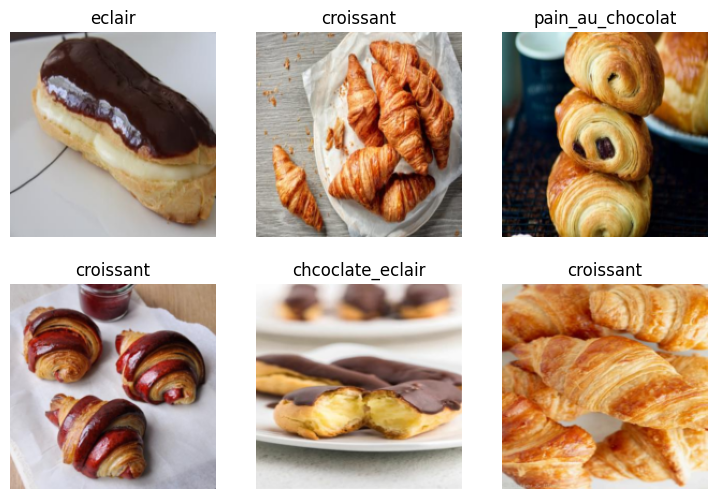

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.540001,0.268677,0.060000,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.493364,0.218863,0.060000,00:54
1,0.361854,0.247881,0.060000,00:53
2,0.285194,0.170070,0.050000,00:53


In [17]:
pastry_type,_,probs = learn.predict(PILImage.create('eclair.jpg'))
print(f"This is a: {pastry_type}.")
print(f"Probability it's an eclair: {probs[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a: chcoclate_eclair.
Probability it's an eclair: 0.9447


In [18]:
pastry_type,_,probs = learn.predict(PILImage.create('pain_au_chocolat.jpg'))
print(f"This is a: {pastry_type}.")
print(f"Probability it's a pain_au_chocolat: {probs[0]:.4f}")

This is a: pain_au_chocolat.
Probability it's a pain_au_chocolat: 0.0001


In [19]:
pastry_type,_,probs = learn.predict(PILImage.create('croissant.jpg'))
print(f"This is a: {pastry_type}.")
print(f"Probability it's an croissant: {probs[0]:.4f}")

This is a: croissant.
Probability it's an croissant: 0.0001
